In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import KBinsDiscretizer


from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Область работы 2 (поиск лучшей модели)

In [2]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# Путь к тренировочному набору
# 

path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок !!!

In [3]:
df = pd.read_csv(path_train)
display(df.sample(10))
df.info()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
181,3430000,-1.406286,0.816683,-1.386224,0.405623,-0.126718,-1.227462,-1.580916,0.341890,1.311612,...,-0.141322,1.804941,0.047278,-0.570187,-0.523626,-0.805741,1.378217,1.492981,-0.679063,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
87,6475000,1.222962,0.621220,1.042114,0.405623,-0.126718,-1.401360,-0.756049,1.716210,-1.059068,...,-0.141322,1.804941,0.047278,-0.570187,-0.317112,1.517692,-0.929397,-1.616859,1.472618,-0.478408
234,2408000,1.222962,-0.938783,-0.699002,-2.465344,0.420182,0.447845,0.549001,-1.209201,0.828746,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.327107,-0.805741,-0.929397,-1.474585,-0.679063,1.307431
194,4270000,-1.406286,1.542131,1.208154,0.405623,-1.923270,-1.577709,-0.887972,-0.410579,0.134284,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.777166,0.355976,-0.929397,0.505173,-0.679063,1.307431
122,3500000,-0.091662,0.640116,1.014441,0.405623,-1.685241,-1.371969,0.436681,-1.555259,-1.367143,...,-0.141322,-0.554035,-1.308863,-0.570187,-1.092385,0.355976,-0.929397,-0.201484,-0.679063,1.307431
212,4277000,-0.091662,-0.216873,-0.807390,0.405623,-0.126718,-0.024866,-0.717524,-1.225177,-0.981869,...,-0.141322,1.804941,0.047278,-0.570187,0.161047,1.517692,0.224410,1.280672,-0.679063,-0.478408
11,4900000,-0.091662,0.316597,-0.175514,0.405623,-0.126718,-0.108141,-0.979114,-0.871747,0.174956,...,-0.141322,-0.554035,0.047278,-0.570187,0.692681,-0.805741,-0.929397,0.764736,-0.679063,-0.478408
163,4900000,-0.091662,0.707892,0.115056,0.405623,0.326671,-0.024866,0.741622,-0.916362,0.929348,...,-0.141322,-0.554035,1.403419,-0.570187,-0.449390,-0.805741,0.224410,0.145381,-0.679063,-0.478408
344,7210000,-0.091662,0.167349,1.166644,0.405623,1.618828,2.992646,1.276001,1.027664,1.687587,...,3.136137,-0.554035,1.403419,1.421812,-1.186473,0.355976,2.532024,1.485288,1.472618,3.093270


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

In [4]:
y = np.array(df.price)
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y)

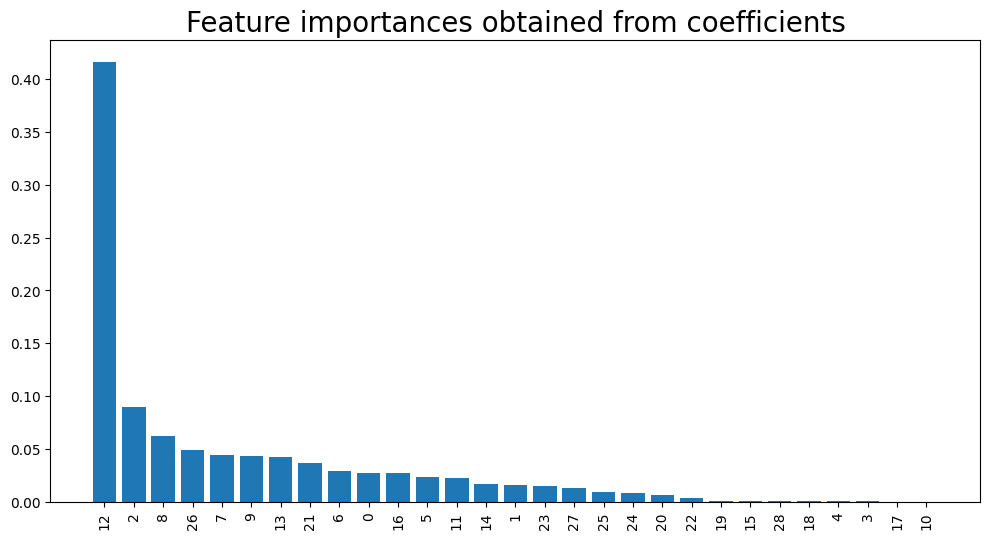

In [5]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12,6))
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [6]:
selected_features = importances.index
selected_features = selected_features[0:17]
selected_features

Index([12, 2, 8, 26, 7, 9, 13, 21, 6, 0, 16, 5, 11, 14, 1, 23, 27], dtype='int64')

In [7]:
ct = ColumnTransformer([
        ("select", StandardScaler(), selected_features)
        ])

In [8]:
dt_model = make_pipeline(ct, DecisionTreeRegressor())
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print('mape: ', mean_absolute_percentage_error(y_test,dt_pred))

mape:  0.29654665233515975


### Область работы 3 (выполнение лучшей модели)

In [9]:
# Данный блок(и) в области 3 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [10]:
# Путь к тренировочному набору
path_train = ... # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = ... # содержит только имя файла, без имен папок

In [6]:
# Блок(и) обучения и поверки модели

In [7]:
# Блок предсказания с использованием тестового набора

In [ ]:
# Маска отобраных номеров строк для предсказания из тестового набора
mask =
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict =